In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker
# use latex for font rendering
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


In the above equations, θ is the astrometric signal of a planet. If we take the mass of the planet to be “mp” orbiting a star with mass “m⋆” and assume a circular orbit and that mp ≪ m⋆. At a distance “d” from the observer and a radius “a,” the astrometric signal, θ equals...

signal = 3 micro-as * (m_p/m_earth)*(m_star/m_sun)^(-2/3)*(P/year)^(2/3)*(d/pc)^(-1)

In [50]:
from astropy.constants import M_jup, M_earth, M_sun


colors = ["#efb734", "#0156c7"]

linestyles = ['solid', 'solid']

m_p = [0.152 * M_jup/M_earth,
       0.266 * M_jup/M_earth]

m_p_err = [0.096 * M_jup/M_earth,
          0.086 * M_jup/M_earth]
       
period_astrometry = [160.88420/365,
                    841.42/365]

#parallax [mas] = 2.8446 [0.0134] A 2020yCat.1350....0G
distance = 1/0.0028446
m_s = 0.94




In [51]:
astrom_signals = []
for ii in range(0, len(m_p)):
    astrometric_signal = 3 * (m_p[ii])*(m_s)**(-2/3)*(period_astrometry[ii])**(2/3)*(distance)**(-1)
    astrom_signals.append(astrometric_signal)
    
astrom_signals_low = []
for ii in range(0, len(m_p)):
    astrometric_signal = 3 * (m_p[ii]-m_p_err[ii])*(m_s)**(-2/3)*(period_astrometry[ii])**(2/3)*(distance)**(-1)
    astrom_signals_low.append(astrometric_signal)
    
    
astrom_signals_high = []
for ii in range(0, len(m_p)):
    astrometric_signal = 3 * (m_p[ii]+m_p_err[ii])*(m_s)**(-2/3)*(period_astrometry[ii])**(2/3)*(distance)**(-1)
    astrom_signals_high.append(astrometric_signal)
    
    
    
yerrs1 = np.array(astrom_signals_high)-np.array(astrom_signals)
yerrs2 = np.array(astrom_signals)-np.array(astrom_signals_low)

if yerrs1.all() == yerrs2.all():
    yerrs = yerrs1
    
else:
    print('error, yerrs dont match!!!')

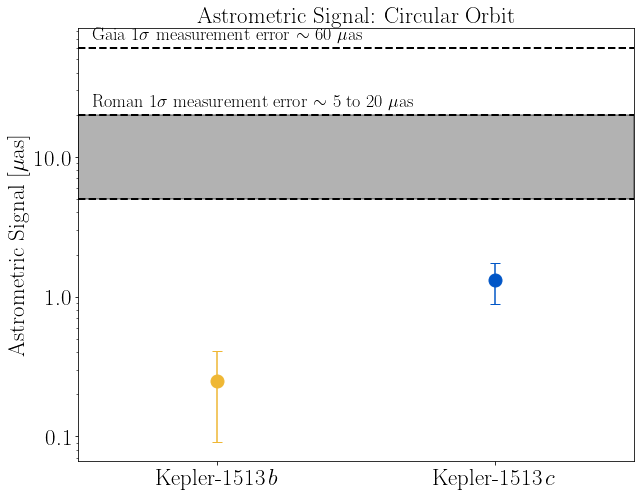

In [52]:
fig, ax = plt.subplots(figsize = [9, 7])

for ii in range(0, len(m_p)):
    plt.errorbar([1,3][ii], astrom_signals[ii], yerr = yerrs[ii], color = colors[ii], 
                 ls='', marker='o', ms=13, capsize=5)

plt.yscale('log')

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

#plt.ylim(1, 500)
plt.xlim(0, 4)
# Remove other x-axis ticks
plt.gca().xaxis.set_ticks([])

# Customize the x-axis ticks
plt.xticks([1, 3], [r'Kepler-1513$\,b$', r'Kepler-1513$\,c$'], rotation = 0)




plt.axhline(60, 0, 1, color='k', lw=2, ls='--')
plt.text(0.1, 69, r'Gaia 1$\sigma$ measurement error $\sim$ 60 $\mu$as', fontsize=18, fontweight='bold')

plt.axhline(5, 0, 1, color='k', lw=2, ls='--')
plt.axhline(20, 0, 1, color='k', lw=2, ls='--')
plt.axhspan(5, 20, 0, 1, color='k', lw=2, alpha=0.3)
plt.text(0.1, 23, r'Roman 1$\sigma$ measurement error $\sim$ 5 to 20 $\mu$as', fontsize=18, fontweight='bold')


plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


plt.title('Astrometric Signal: Circular Orbit', fontsize = 23)
plt.ylabel(r'Astrometric Signal [$\mu$as]', fontsize = 23)

plt.tight_layout()
plt.savefig('astrometric_signal.pdf')
plt.show()

In [86]:
from astropy import units as u
from astropy.constants import G

m_p = [0.152 * M_jup,
       0.266 * M_jup]

m_p_err = [0.096 * M_jup,
          0.086 * M_jup]

ecc = [0.31,
      0.13]
       
period_astrometry = [(160.88420 * u.d).to(u.s),
                    (841.42 * u.d).to(u.s)]

#parallax [mas] = 2.8446 [0.0134] A 2020yCat.1350....0G
distance = (1/0.0028446 * u.parsec)
m_s = 0.94 * M_sun

In [87]:
period_astrometry[0]

<Quantity 13900394.88 s>

In [88]:
def get_semi_major_axis(period, mp, mstar, ecc):
    a_third = ((G * (mp+mstar) * (period**2.)) / (4 * (np.pi**2.))) 
    a = a_third ** (1./3.)
    
    a_w_ecc = a / np.sqrt(1 - ecc**2.)
    
    return a_w_ecc


In [89]:
def get_astrometric_signal(period, m_p, m_s, ecc, distance):
    a_p = get_semi_major_axis(period, m_p, m_s, ecc)
    a_p_au = a_p.to(u.au)

    a_s = a_p * (m_p / m_s)
    a_s_au = a_s.to(u.au)
    
    #use small angle approx to return astrom signal in microarcseconds
    return (a_s_au/distance).value * 10**6.

    

In [91]:
for ii in range(0, len(m_p)):
    print(get_astrometric_signal(period_astrometry[ii], 
                                 m_p[ii], 
                                 m_s, 
                                 ecc[ii], 
                                 distance))

0.26192110517028194
1.3242996609093927


In [82]:
distance = (1/0.0028446 * u.parsec)

print(distance)

a_p = get_semi_major_axis(period_astrometry[0], m_p[0], m_s, 0.)
a_p_au = a_p.to(u.au)

mu = m_p[0]/m_s
a_star = (mu / (1 + mu)) * a_p
a_s = a_p * (m_p[0] / m_s)
a_s_au = a_star.to(u.au)

print(a_p)
print(a_s)
print('')

print(a_p_au)
print(a_s_au)
print('')

print((a_p_au/distance).value * 10**6., 'microarcseconds')
print((a_s_au/distance).value * 10**6., 'microarcseconds')

351.5432749771497 pc
84839940055.73225 m
13095886.248192327 m

0.5671199707505746 AU
8.75270818961147e-05 AU

1613.2294687970846 microarcseconds
0.2489795371616879 microarcseconds
